In [3]:
import numpy as np
import pandas as pd
import random as rnd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from scipy.stats import *
from sklearn import preprocessing 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [165]:
df=pd.read_csv('regLinPoli.csv')
df.head()


,X,X2,X3,X4,X5,y
0,7.317938,53.552216,0.864389,0.859736,114,50.552216
1,1.284357,1.649574,0.108686,0.959256,115,2.649574
2,97.740652,9553.235089,1.990075,-0.344100,116,9643.235089
3,17.753591,315.190006,1.249286,-0.889370,117,310.190006
4,66.441081,4414.417290,1.822437,-0.450777,118,4390.417290


In [166]:
X=np.array(df.iloc[:,0:5]) 
y=np.array(df.iloc[:,5])

In [167]:
scalerx = preprocessing.StandardScaler().fit(X) 
#scalery = preprocessing.StandardScaler().fit(y) 
x_c=np.array(pd.DataFrame(scalerx.transform(X)))
y_c=np.array((y-np.mean(y))/np.std(y))

In [169]:
X_train,X_test,y_train,y_test=train_test_split(x_c,y_c,test_size=0.75,random_state=101)

**funcion de estimación**

In [13]:
def salida(w0,w,X):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X[i]
    return suma

**regularización por renglón**    

In [16]:
def regularizado(w,x,y,lam,eta):

    for i in range(len(x)):

        sal = salida(w[0],w[1:len(w)],x[i])
        #Calculo el error de prediccion        
        error =y[i] - sal
        # Obtengo el error w0
        w[0] = w[0] + eta*error
        
    
        for j in range(len(x.T)):
            w[j+1] = w[j+1] + eta*error*x[i,j] - lam*w[j+1]
        
    return w

**Error con $\lambda=0$ y $\eta=0.05$**

In [286]:
w= [rnd.random() for i in range(X_train.shape[1]+1)]
ws=regularizado(w,X_train,y_train,0,0.05)
np.mean((y_test - (ws[0]+np.dot(X_test,ws[1:len(ws)])))**2)

0.0019467683897903491

**Error con $\lambda=0.01$ y $\eta=0.05$**

In [287]:
w= [rnd.random() for i in range(X_train.shape[1]+1)]
ws=regularizado(w,X_train,y_train,0.01,0.05)
np.mean((y_test - (ws[0]+np.dot(X_test,ws[1:len(ws)])))**2)

0.026962021614682696

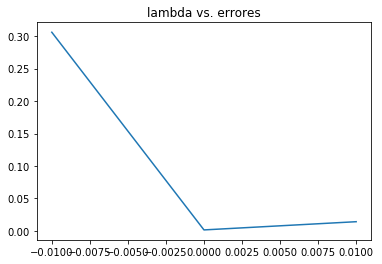

In [294]:
import random as rnd
lam = np.arange(-.01,0.02,0.01)
error_lambda = []

for l in range(lam.size):
    w= [rnd.random() for i in range(X_train.shape[1]+1)]
    w =regularizado(w,X_train,y_train,lam[l],0.1)
    error_lambda = error_lambda + [np.mean((y_test - (w[0]+ np.dot(X_test,w[1:len(w)])))**2)]
    
plt.plot(lam,error_lambda)
plt.title('lambda vs. errores')

In [198]:
def agregar_unos(m):
    unos = np.array([np.ones(m.shape[0])])
    return np.concatenate((unos.T,m),axis=1)

In [114]:
def wreg(x,y,eta,lamb):
    w=np.ones(len(np.transpose(x))+1)
    error=np.array([]) 
    w0=np.array([]) 
    w1=np.array([])
    while (np.sum((y - np.dot(w,agregar_unos(x).T))))**2 > 0.01:
        error=np.append(error,(np.sum((y - np.dot(w,agregar_unos(x).T))))**2) 
        w0=np.append(w0,w[0]) 
        w1=np.append(w1,w[1])
        #print(w[0],w[1])
        res=y-np.dot(w,agregar_unos(x).T) 
        w[0]= w[0] + (eta * np.sum(res)/len(y)) 
        for i in (range(len(x.T))):
            w[i+1]=w[i+1]+eta*np.sum(res*agregar_unos(x)[:,i+1])/len(y)-lamb*w[i+1]
        error2=np.mean((np.dot(w,agregar_unos(x).T) - y_train)**2)
    return w,error2

w,error2=wreg(X_train,y_train,0.05,0) 

In [68]:
def wreg(x,y,eta,lamb):
    w=np.ones(len(np.transpose(x))+1) 
    res=y-np.dot(w,agregar_unos(x).T) 
    w[0]= w[0] + (eta * np.sum(res)/len(y)) 
    for i in range(len(x.T)): 
        w[i+1]=w[i+1]+eta*np.sum(res*agregar_unos(x)[:,i+1])/len(y)-lamb*w[i+1] 
        
    #error= (sum(np.dot(w,agregar_unos(x).T) - y_train))**2/len(y_train) 
    error2=np.mean((np.dot(w,agregar_unos(x).T) - y_train)**2)
    return w,error2

wreg(X_train,y_train,0.05,0.01) 

(array([ 0.94317568,  0.89759055,  0.90148289,  0.90981971,  0.94813746,
         0.93663538]), 5.2094757719857254)

**Para $\lambda=0$**

In [115]:
wreg(X_train,y_train,0.05,0) 

(array([-0.00569038,  0.31874746,  0.60546872,  0.03166291,  0.01591668,
         0.02714647]), 0.012280845810861054)

**Para $\lambda=0.01$**

In [116]:
wreg(X_train,y_train,0.05,.01)

(array([-0.02114625,  0.323652  ,  0.47772142,  0.07562006,  0.0116162 ,
         0.02766529]), 0.03022662308931964)

In [36]:
[j for j in np.arange(0,1,1)]

[0.0,
 0.10000000000000001,
 0.20000000000000001,
 0.30000000000000004,
 0.40000000000000002,
 0.5,
 0.60000000000000009,
 0.70000000000000007,
 0.80000000000000004,
 0.90000000000000002]

In [19]:
X1=np.array([0,1,2,0,0])
X2=np.array([1,0,2,0,1])
X=np.array([X1,X2])
y=np.array([1,-1])

In [20]:
np.shape(X)

(2, 5)

In [21]:
w=np.ones(X.shape[1]+1)
w=regularizado(w,X,y,0,.1)

In [22]:
w

array([ 0.25,  0.55,  0.7 , -0.5 ,  1.  ,  0.55])

In [98]:
def minibatch(eta=0.05,paso=0.0001220703125):
    w=wreg(X_train,y_train,0.05,2.5) 
    W = np.copy(w)
    lamb = 0
    errorl = []
    primero = (sum(np.dot(w,agregar_unos(X_train).T) - y_train[:,0]))**2 + lamb*w[]
    for j in np.arange(0,1,paso):
        eta = 0.05
        lamb = j
        w[0] = w[0] + (eta * sum((y_train - np.dot(w,agregar_unos(X_train).T)))/len(y_train))
        for i in range(1,len(w)):
            w[i] = w[i] + (eta * sum((y_train - np.dot(w,agregar_unos(X_train).T)) #
                                     * agregar_unos(X_train)[:,i])/len(y_train)) - (lamb * np.dot(w.T,w))
        errorl.append((sum(np.dot(w,agregar_unos(X_train).T) - y_train))**2 + lamb*np.dot(w.T,w))
        if (sum(np.dot(w,agregar_unos(X_train).T) - y_train))**2 + lamb*np.dot(w.T,w) > primero:
            break
    return w, errorl

In [99]:
minibatch(eta=0.05,paso=0.0001220703125)

/home/abraham/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in double_scalars
/home/abraham/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in double_scalars
/home/abraham/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in square


ValueError: setting an array element with a sequence.